# **Anime Impact on Japanese Overseas Visits**
## A Data Analysis Project


### Fernando Herrera

### **Introduction**
Anime products are a very important part of the japanese entertainment content industry, with consumers not only from Japan but from all around the world. Out of the most popular anime shows worldwide we can mention and recall names like Naruto, One Piece, Dragon Ball, and Pokemon, but newer shows have been gaining popularity in both new and old school anime fans, increasing the amount of anime consumers around the world. In 2022, the global anime market only, passed the USD 25 billion value mark, and it is expected to reach USD 50 billion by 2030. Not only for being a culturally rich and beautiful country, Japan is often also visited with the motivation of encountering real life landscapes, cities and landmarks featured in anime shows. Some other anime fans find great interest in learning and perfecting their japanese language skills, not only to be able to communicate with the japanese community in their native languge but also to enjoy their favorite anime shows without having to pay too much close attention to the subtitles. The purpose of this project is to determine wether the rating of the episodes one of the most popular and oldest currently streaming animes, One Piece, has any impact on the amount of foreign visitors to Japan. The average rating of the episodes was obtained from IMDb's web page, which is currently one of the most respected sources to obtain rating information of any media content.

### **Methodology**
This analysis uses the dataset: "Overseas Residents Visits to Japan", which is publicly and officialy available [here](https://www.tourism.jp/en/tourism-database/stats/outbound/). This set of data offers information regarding the amount of visitors to Japan from different countries per month in years from 1996-2023. The episodes rating data of One Piece was obtained from IMDb's official webpage [here](https://www.imdb.com/title/tt0388629/episodes/?season=1), displaying all available episodes and downloading the html file, in order to scrape the information. Once both datasets were saved in individual dataframes, the average monthly episode rating was obtained by grouping. Then only rows with a common date (month and year) in both dataframes were saved to a new dataframe in order to test and visualize for correlation through scatter and shared line plots.

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from pathlib import Path

PROJECT_DIR = Path().parent.resolve()
FILES_DIR = Path(PROJECT_DIR, 'Files')

First we import the data set from the excel file and we select the row 3 as headers, since the first 2 rows contain the title and a blank space.

In [18]:
visits = pd.read_excel(Path(FILES_DIR, 'JTM_inbound_20230823eng.xlsx'),
                     header=2)
visits.head(24)

,Monthly,Grand Total,%Change,Unnamed: 3
0,1996 Jan．,276086,NaN,NaN
1,Feb．,283667,NaN,NaN
2,Mar．,310702,NaN,NaN
3,Apr．,329303,NaN,NaN
4,May．,326156,NaN,NaN
5,Jun．,316699,NaN,NaN
6,Jul．,377070,NaN,NaN
7,Aug．,345020,NaN,NaN
8,Sep．,311881,NaN,NaN
9,Oct．,366841,NaN,NaN


To select data from 2000 up to 2019 (before pandemic to avoid major outer fluctuation causes), we can select all rows from indexes 48 (12x4) until 287 (48 + 12x24). We also select only the first two columns containing the month and the grand total of visitors for that period.

In [19]:
visits_2000_2019 = visits.iloc[48:288,0:2].reset_index(drop=True)
print(visits_2000_2019.head(12))
print(visits_2000_2019.tail(12))

     Monthly  Grand Total
0   2000　Jan．      335621
1        Feb．      360621
2        Mar．      365689
3        Apr．      443028
4        May．      381053
5        Jun．      400139
6        Jul．      483849
7        Aug．      423361
8        Sep．      379753
9        Oct．      443862
10       Nov．      378910
11       Dec．      361260
      Monthly  Grand Total
228  2019　Jan．     2689339
229       Feb．     2604322
230       Mar．     2760136
231       Apr．     2926685
232       May．     2773091
233       Jun．     2880041
234       Jul．     2991189
235       Aug．     2520134
236       Sep．     2272883
237       Oct．     2496568
238       Nov．     2441274
239       Dec．     2526387


As we can see, the year can only be obtained from the rows containing the information for the months of January. We will add a new column called Month containing only month initials from Jan-Dic times 20 to cover all years from 2000-2019. The dot at the end will be deleted for easier comparation later on.

In [20]:
months = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']*20
visits_2000_2019.insert(1,'Month',months)
visits_2000_2019.head(12)

,Monthly,Month,Grand Total
0,2000 Jan．,Jan,335621
1,Feb．,Feb,360621
2,Mar．,Mar,365689
3,Apr．,Apr,443028
4,May．,May,381053
5,Jun．,Jun,400139
6,Jul．,Jul,483849
7,Aug．,Aug,423361
8,Sep．,Sep,379753
9,Oct．,Oct,443862


Now we create a new column for the years, repeating each year from 2000-2019 12 times. After this we can safely drop the "Monthly " column. Notice it was imported from the excel file with a space at the end.

In [21]:
years = []
for year in range(2000, 2020):
    years.extend([year] * 12)

visits_2000_2019.insert(2,'Year', years)
visits_2000_2019.drop('Monthly ', axis=1, inplace=True)

print(visits_2000_2019.head(12))
print(visits_2000_2019.tail(12))

   Month  Year Grand Total
0    Jan  2000      335621
1    Feb  2000      360621
2    Mar  2000      365689
3    Apr  2000      443028
4    May  2000      381053
5    Jun  2000      400139
6    Jul  2000      483849
7    Aug  2000      423361
8    Sep  2000      379753
9    Oct  2000      443862
10   Nov  2000      378910
11   Dec  2000      361260
    Month  Year Grand Total
228   Jan  2019     2689339
229   Feb  2019     2604322
230   Mar  2019     2760136
231   Apr  2019     2926685
232   May  2019     2773091
233   Jun  2019     2880041
234   Jul  2019     2991189
235   Aug  2019     2520134
236   Sep  2019     2272883
237   Oct  2019     2496568
238   Nov  2019     2441274
239   Dec  2019     2526387


We can insert an additional column called "Date" with the combination of both the month and year.

In [22]:
visits_2000_2019.insert(2,'Date', visits_2000_2019['Month'] + " " + visits_2000_2019['Year'].astype(str))
visits_2000_2019.head()

,Month,Year,Date,Grand Total
0,Jan,2000,Jan 2000,335621
1,Feb,2000,Feb 2000,360621
2,Mar,2000,Mar 2000,365689
3,Apr,2000,Apr 2000,443028
4,May,2000,May 2000,381053


We can now plot the data against the date to initially visualize it's behavior.

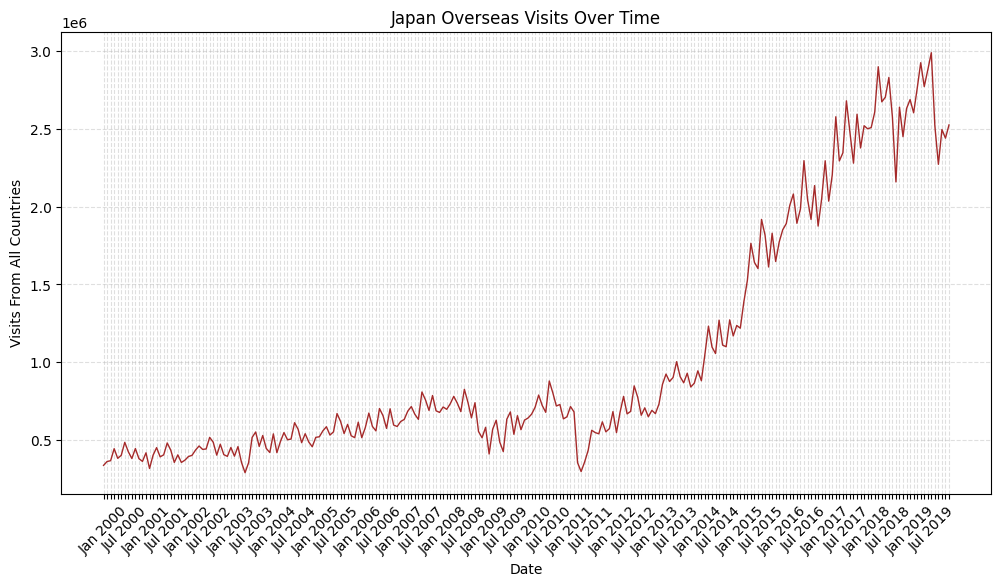

In [25]:
plt.figure(figsize=(12,6))
sns.lineplot(data=visits_2000_2019, 
             x='Date', y='Grand Total',
             color='brown', linewidth=1)
plt.grid(True, linestyle='--', alpha=0.4)

x_labels = [label if i % 6 == 0 else '' for i, label in enumerate(visits_2000_2019['Date'])]
plt.xticks(range(len(x_labels)), x_labels)
plt.xticks(rotation=45)

plt.xlabel('Date')
plt.ylabel('Visits From All Countries')
plt.title('Japan Overseas Visits Over Time')

plt.show()

We can appreciate a general exponential growth with several sudden increases like from 2014 to 2015, and some drops like from 2010 to 2011. We can remove the exponential component by applying natural logarithm to the dataset.

In [26]:
import math
visits_2000_2019['Adjusted Grand Total'] = visits_2000_2019['Grand Total'].map(math.log)
visits_2000_2019.head()

,Month,Year,Date,Grand Total,Adjusted Grand Total
0,Jan,2000,Jan 2000,335621,12.723738
1,Feb,2000,Feb 2000,360621,12.795583
2,Mar,2000,Mar 2000,365689,12.809539
3,Apr,2000,Apr 2000,443028,13.001388
4,May,2000,May 2000,381053,12.850694


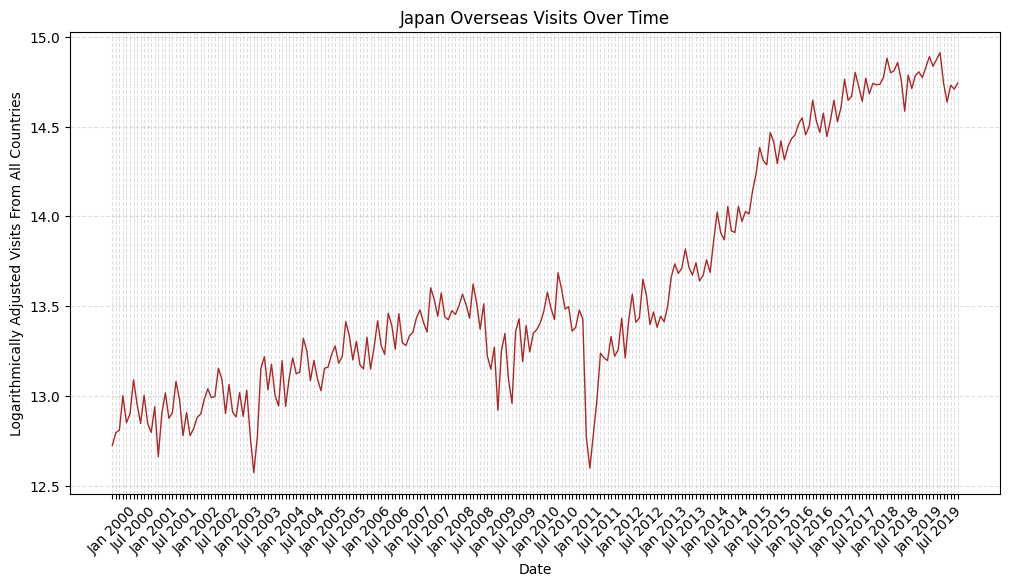

In [27]:
plt.figure(figsize=(12,6))
sns.lineplot(data=visits_2000_2019, 
             x='Date', y='Adjusted Grand Total',
             color='brown', linewidth=1)
plt.grid(True, linestyle='--', alpha=0.4)

x_labels = [label if i % 6 == 0 else '' for i, label in enumerate(visits_2000_2019['Date'])]
plt.xticks(range(len(x_labels)), x_labels)
plt.xticks(rotation=45)

plt.xlabel('Date')
plt.ylabel('Logarithmically Adjusted Visits From All Countries')
plt.title('Japan Overseas Visits Over Time')

plt.show()

This way, we can more clearly see the linear increase of tourism in Japan and identify individual components. We can also see more clearly the decrease in visits during 2011, which was due to the earthquake and tsunami that wreaked havoc in several regions of Japan in March of 2011.

For the episodes rating data, we import BeautifulSoup for web scraping the IMDb wepage html file.

In [29]:
from bs4 import BeautifulSoup

page_path = Path(FILES_DIR, 'OnePiece_TVSeries1999_EpisodeList_IMDb.html')

with open(page_path, 'r', encoding='utf-8') as file:
    html_content = file.read()

soup = BeautifulSoup(html_content, 'html.parser')

We create a helper function that will allow us to extract the month in string date and return it in the same format we have been using for the previous dataset.

In [30]:
months = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
def get_month(date: str):
    for month in months:
        if month in date:
            return month

The webpage shows every episode information within an article tag, so we loop through every single one of these tags and extract the information for each episode.

In [31]:
data = []

for i, episode in enumerate(soup.find_all('article')):
    # Stop at last episode because it is not reviewed yet. Episode 1078 is also ignored
    # due to a specific html structure only for that episode.
    if (i >= 1078 and i <= 1079): 
        break
        
    if episode.get('class') is None or 'episode-item-wrapper' not in episode.get('class'):
        continue
    # Some episodes in the page have a Top-Rated tag, which adds two more divs after divs_root.
    # We handle that accessing two divs higher on the last find_all('div'). There should only be 8
    # Divs for Non-Top-Rated episodes. There's also 11 exceptions for episodes that have only 4 divs
    # at that level, but the following div is still accessed normally, that's why we also take into
    # account that amount of divs, which leaves the rating 4 divs prior than normal.
    divs_root = episode.find('div').find('div').find_all('div')[5].find_all('div')
    divs = len(divs_root)
    if(divs == 8):
        date = divs_root[0].find('span').text
        rating = float(divs_root[6].find('div').find('span').text.lstrip()[0:3])
    elif(divs == 4):
        date = divs_root[0].find('span').text
        rating = float(divs_root[2].find('div').find('span').text.lstrip()[0:3])
    else: #10 divs
        date = divs_root[2].find('span').text
        rating = float(divs_root[8].find('div').find('span').text.lstrip()[0:3])
    row = [get_month(date), int(date[-4:]), rating]
    data.append(row)

rating_df = pd.DataFrame(data,
                        columns=['Month', 'Year', 'Rating']) 
print(rating_df.head())
print(rating_df.tail())
    

  Month  Year  Rating
0   Oct  1999     7.7
1   Nov  1999     7.7
2   Nov  1999     7.6
3   Dec  1999     8.3
4   Dec  1999     7.4
     Month  Year  Rating
1073   Sep  2023     9.5
1074   Sep  2023     8.9
1075   Sep  2023     9.5
1076   Sep  2023     8.7
1077   Oct  2023     8.7


Now that the data is ready, we can notice that episodes keep airing up until 2023, and the visits data was sliced until 2019. Therefore, we need to remove the data after year 2019 and we can then average the scores per month using standard grouping in pandas.

In [32]:
rating_until_2019 = rating_df[rating_df['Year'] <= 2019].copy()
rating_until_2019['Month'] = pd.Categorical(rating_until_2019['Month'], categories=months, ordered=True)

rating_until_2019 = rating_until_2019.sort_values(by=['Year', 'Month'])

monthly_avg_rating_until_2019 = rating_until_2019.groupby(['Year','Month'])['Rating'].mean().reset_index()

print(monthly_avg_rating_until_2019.head(12))
print(monthly_avg_rating_until_2019.tail(12))


    Year Month  Rating
0   1999   Jan     NaN
1   1999   Feb     NaN
2   1999   Mar     NaN
3   1999   Apr     NaN
4   1999   May     NaN
5   1999   Jun     NaN
6   1999   Jul     NaN
7   1999   Aug     NaN
8   1999   Sep     NaN
9   1999   Oct    7.70
10  1999   Nov    7.65
11  1999   Dec    7.74
     Year Month  Rating
240  2019   Jan   9.175
241  2019   Feb   9.025
242  2019   Mar   8.925
243  2019   Apr   6.975
244  2019   May   6.850
245  2019   Jun   7.900
246  2019   Jul   8.400
247  2019   Aug   8.150
248  2019   Sep   7.580
249  2019   Oct   7.925
250  2019   Nov   8.800
251  2019   Dec   9.375


/var/folders/nv/2ttrxtqn3bq9pxbngrkdlckw0000gn/T/ipykernel_12425/3665437578.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_avg_rating_until_2019 = rating_until_2019.groupby(['Year','Month'])['Rating'].mean().reset_index()


Due to the way we grouped we can see some Ratings were set as NaN, so we can just drop those rows. We also add a new column for the Month + Year date format.

In [33]:
monthly_avg_rating_until_2019 = monthly_avg_rating_until_2019.dropna(subset=['Rating']).reset_index(drop=True)
monthly_avg_rating_until_2019.insert(2,'Date', monthly_avg_rating_until_2019['Month'].astype(str) + " " + monthly_avg_rating_until_2019['Year'].astype(str))
monthly_avg_rating_until_2019

,Year,Month,Date,Rating
0,1999,Oct,Oct 1999,7.700000
1,1999,Nov,Nov 1999,7.650000
2,1999,Dec,Dec 1999,7.740000
3,2000,Jan,Jan 2000,7.266667
4,2000,Feb,Feb 2000,7.550000
...,...,...,...,...
231,2019,Aug,Aug 2019,8.150000
232,2019,Sep,Sep 2019,7.580000
233,2019,Oct,Oct 2019,7.925000
234,2019,Nov,Nov 2019,8.800000


We can then merge both data sets to have a final dataset with the Date (month and year), the average rating of the episodes released during that period and the number of visits. By performing an inner join we can make sure that we only take into account visit samples of dates in which One Piece episodes were released, this in order make the correlation analysis easier

In [34]:
master_data = pd.merge(monthly_avg_rating_until_2019, visits_2000_2019, on='Date', how='inner')[['Date','Rating','Adjusted Grand Total']]
master_data

,Date,Rating,Adjusted Grand Total
0,Jan 2000,7.266667,12.723738
1,Feb 2000,7.550000,12.795583
2,Mar 2000,7.825000,12.809539
3,Apr 2000,7.566667,13.001388
4,May 2000,8.080000,12.850694
...,...,...,...
228,Aug 2019,8.150000,14.739823
229,Sep 2019,7.580000,14.636560
230,Oct 2019,7.925000,14.730428
231,Nov 2019,8.800000,14.708031


To determine correlation we can use the Pandas correlation matrix method and we draw a scatter plot aswell between average rating and visits.

                        Rating  Adjusted Grand Total
Rating                1.000000              0.307957
Adjusted Grand Total  0.307957              1.000000


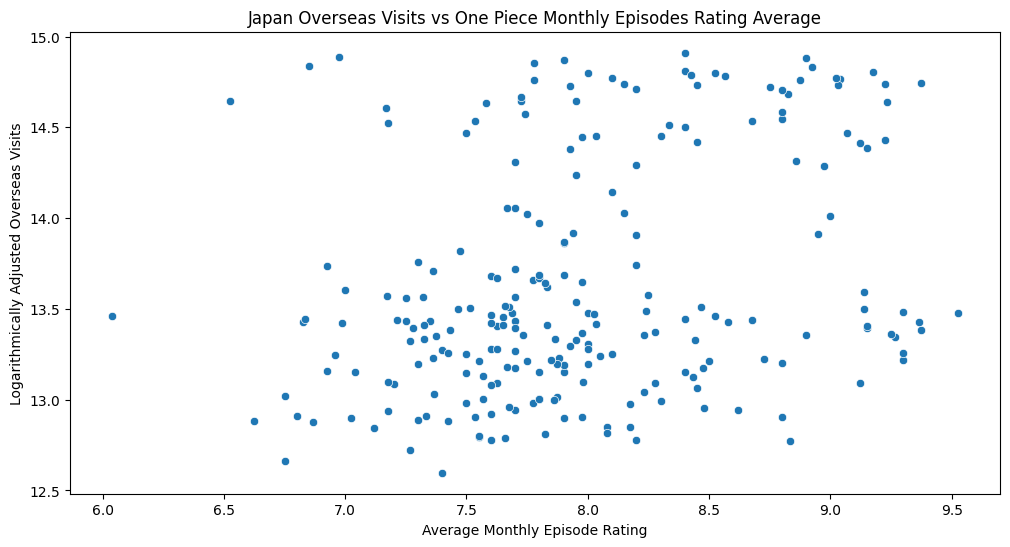

In [35]:
print(master_data[['Rating','Adjusted Grand Total']].corr())

plt.figure(figsize=(12,6))
sns.scatterplot(data=master_data, x='Rating', y='Adjusted Grand Total')
plt.title('Japan Overseas Visits vs One Piece Monthly Episodes Rating Average')
plt.xlabel('Average Monthly Episode Rating')
plt.ylabel('Logarithmically Adjusted Overseas Visits')
plt.show()

We can notice that there is no strong correlation between the average rating episodes of One Piece to the logarithmically adjusted. We can also visualize this relation by adjusting the Rating to the range of the adjusted visits. First, this is how it plots without adjustment: 

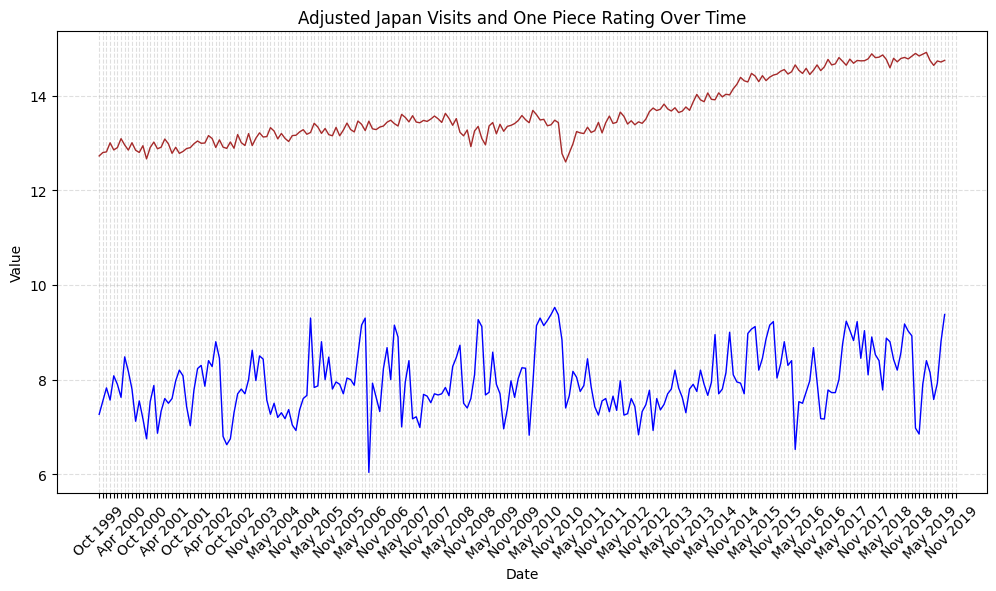

In [36]:
plt.figure(figsize=(12,6))
sns.lineplot(data=master_data, 
             x='Date', y='Rating',
             color='blue', linewidth=1)
plt.grid(True, linestyle='--', alpha=0.4)
sns.lineplot(data=master_data, 
             x='Date', y='Adjusted Grand Total',
             color='brown', linewidth=1)
plt.grid(True, linestyle='--', alpha=0.4)

x_labels = [label if i % 6 == 0 else '' for i, label in enumerate(monthly_avg_rating_until_2019['Date'])]
plt.xticks(range(len(x_labels)), x_labels)
plt.xticks(rotation=45)

plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Adjusted Japan Visits and One Piece Rating Over Time')

plt.show()

Scaling using MinMaxScaler from sklearn and then plotting:

In [38]:
from sklearn.preprocessing import MinMaxScaler

min_ = master_data['Adjusted Grand Total'].min()
max_ = master_data['Adjusted Grand Total'].max()

scaler = MinMaxScaler(feature_range=(min_, max_))

master_data['Adjusted Rating'] = scaler.fit_transform(master_data[['Rating']])
master_data

,Date,Rating,Adjusted Grand Total,Adjusted Rating
0,Jan 2000,7.266667,12.723738,13.411898
1,Feb 2000,7.550000,12.795583,13.600000
2,Mar 2000,7.825000,12.809539,13.782569
3,Apr 2000,7.566667,13.001388,13.611065
4,May 2000,8.080000,12.850694,13.951861
...,...,...,...,...
228,Aug 2019,8.150000,14.739823,13.998334
229,Sep 2019,7.580000,14.636560,13.619917
230,Oct 2019,7.925000,14.730428,13.848958
231,Nov 2019,8.800000,14.708031,14.429862


Text(0.5, 1.0, 'Adjusted Japan Visits and One Piece Rating Over Time')

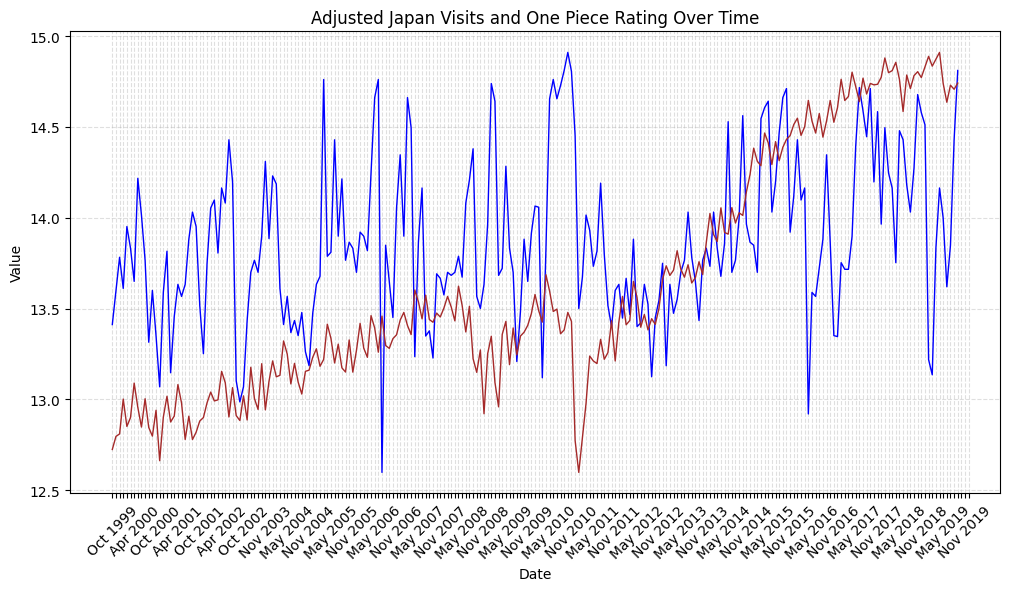

In [39]:
plt.figure(figsize=(12,6))
sns.lineplot(data=master_data, 
             x='Date', y='Adjusted Rating',
             color='blue', linewidth=1)
plt.grid(True, linestyle='--', alpha=0.4)
sns.lineplot(data=master_data, 
             x='Date', y='Adjusted Grand Total',
             color='brown', linewidth=1)
plt.grid(True, linestyle='--', alpha=0.4)

x_labels = [label if i % 6 == 0 else '' for i, label in enumerate(monthly_avg_rating_until_2019['Date'])]
plt.xticks(range(len(x_labels)), x_labels)
plt.xticks(rotation=45)

plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Adjusted Japan Visits and One Piece Rating Over Time')

Now we can compare both values side to side, although, we can see that due to the continous variation of the average rating of the episodes, there is a lot of noise. We can apply a moving average filter of 12 samples (about a year given that One Piece has always been releasing episodes regularly).

In [40]:
master_data['Smooth Total'] = master_data['Adjusted Grand Total'].rolling(window=12).mean()
master_data['Smooth Rating'] = master_data['Adjusted Rating'].rolling(window=12).mean()

Text(0.5, 1.0, 'Adjusted Japan Visits and One Piece Rating Over Time')

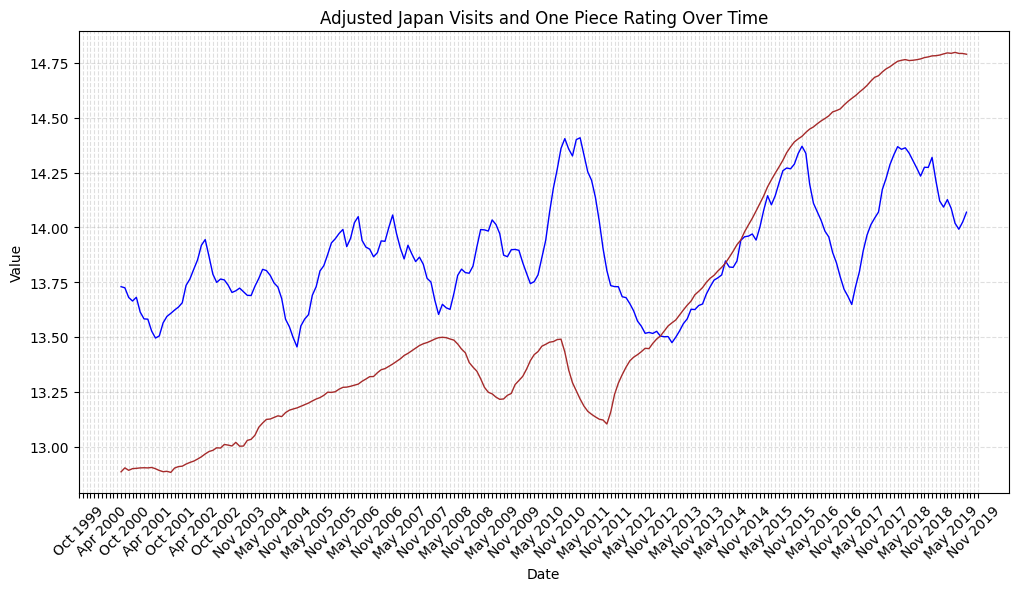

In [41]:
plt.figure(figsize=(12,6))
sns.lineplot(data=master_data, 
             x='Date', y='Smooth Rating',
             color='blue', linewidth=1)
plt.grid(True, linestyle='--', alpha=0.4)
sns.lineplot(data=master_data, 
             x='Date', y='Smooth Total',
             color='brown', linewidth=1)
plt.grid(True, linestyle='--', alpha=0.4)

x_labels = [label if i % 6 == 0 else '' for i, label in enumerate(monthly_avg_rating_until_2019['Date'])]
plt.xticks(range(len(x_labels)), x_labels)
plt.xticks(rotation=45)

plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Adjusted Japan Visits and One Piece Rating Over Time')

### **Discussion**

Taking into account the pearson R generated by Pandas and by analyzing the scatter plot, we can see that there is no clear strong correlation between both variables. Visualizing the mayor fluctuations of both data sets through a shared line plot, we can see that there is no clear sign of relation between events (peaks or falls). We have to take into consideration that major natural disasters or epidemics have had a very important effect on the amount of visitors arriving at Japan. For example, we previously mentioned the 2011 earthquake which generated a decrease in visits during that same year and it's visible in the previous graph, but we can also see a decrease in tourism during mid 2009, due to the AH1N1 Influenza pandemic. Ignoring these events, and after applying the logarithmic adjustment to the data, we can overall see a steady increase in the amount of visitors Japan is having month by month.

### **Conclusions**

After analyzing the results, we can say that there is no sign that the average monthly IMDb rating of One Piece episodes shares correlation with the fluctuations in the japanese foreign visits. As this show is one of the most popular animes in the moment, I personally have no reason to believe that other shows' ratings might individually have an effect on the tourism in Japan. Maybe overall popularity and ratings might have a slight effect during several seasons, but this effect might be stronger in youger age groups traveling to the country.

#### **Full Episodes Dataset Scraping**

In order to take advantage of the already developed web scapping script, a couple modifications were made in order to extract full information from the One Piece episode list in IMDb, including episode number, name, plot, full release date and average rating.

In [42]:
import re

data = []

for i, episode in enumerate(soup.find_all('article')):
    # Stop at last episode because it is not reviewed yet. Episode 1078 is also ignored
    # due to a specific html structure only for that episode.
    if (i >= 1078 and i <= 1079): 
        break
        
    if episode.get('class') is None or 'episode-item-wrapper' not in episode.get('class'):
        continue
    # Some episodes in the page have a Top-Rated tag, which adds two more divs. We handle that
    # accessing two divs higher on the last find_all('div'). There should only be 8 divs for
    # Non-Top-Rated episodes. There's also 11 exceptions for episodes that have only 4 divs at
    # that level, but the following div is still accessed normally, that's why we also take into
    # account that amount of divs.
    divs_root = episode.find('div').find('div').find_all('div')[5].find_all('div')
    divs = len(divs_root)
    if(divs == 8):
        title = divs_root[0].find('h4').find('a').text
        plot = divs_root[1].find_all('div')[3].text
        date = divs_root[0].find('span').text
        rating = float(divs_root[6].find('div').find('span').text.lstrip()[0:3])
    elif(divs == 4):
        title = divs_root[0].find('h4').find('a').text
        plot = "No plot available."
        date = divs_root[0].find('span').text
        rating = float(divs_root[2].find('div').find('span').text.lstrip()[0:3])
    else:
        title = divs_root[2].find('h4').find('a').text
        plot = divs_root[3].find_all('div')[3].text
        date = divs_root[2].find('span').text
        rating = float(divs_root[8].find('div').find('span').text.lstrip()[0:3])
    
    # Remove episode number, line breaks and large spaces from title
    title = title[title.find('∙')+2:]
    title = title.replace('\n','')
    title = re.sub(r'\s+', ' ', title)
    
    # Strip spaces and remove large spaces from plot
    plot = plot.strip()
    plot = re.sub(r'\s+', ' ', plot)
    
    
    # Fix date string format
    year = date[-4:]
    date = date[0:-4].rstrip() + " " + year
    
    row = [i+1, title, plot, date, rating]
    data.append(row)

episodes_df = pd.DataFrame(data,
                        columns=['Episode Number', 'Title', 'Plot', 'Release Date', 'Average Rating']) 

episodes_df.head()

,Episode Number,Title,Plot,Release Date,Average Rating
0,1,I'm Luffy! The Man Who Will Become the Pirate ...,Alvida pirates plunder a ship only to find a b...,"Wed, Oct 20, 1999",7.7
1,2,"The Great Swordsman Appears! Pirate Hunter, Ro...",Luffy and Koby arrive at Shell Island where th...,"Wed, Nov 17, 1999",7.7
2,3,Morgan vs. Luffy! Who's This Beautiful Young G...,"Luffy convinces Zoro to join her crew, but the...","Wed, Nov 24, 1999",7.6
3,4,Luffy's Past! The Red-haired Shanks Appears!,Luffy reflects on his past and how he came in ...,"Wed, Dec 8, 1999",8.3
4,5,"Fear, Mysterious Power! Pirate Clown Captain B...",Nami tricks Luffy into allowing her to turn hi...,"Wed, Dec 15, 1999",7.4


#### Finally, we save the data as a csv file and I'm uploading it for anyone to use!

In [43]:
episodes_df.to_csv(Path(FILES_DIR, 'onepiece_IMDb_episodes_list_1077.csv'))